<CENTER><img src="../Assets/ATLASOD.gif" style="width:50%"></CENTER>

<CENTER><h1>pyROOT notebook example: simple two-samples' comparison</h1></CENTER>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/00


In [2]:
# reading the input files via internet (URL to the file)
bgs = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105985.WW.root")
sig = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_161005.ggH125_WW2lep.root")

## or local files
#bgs = ROOT.TFile.Open("/home/student/datasets/MC/mc_105985.WW.root")
#sig = ROOT.TFile.Open("/home/student/datasets/MC/mc_161005.ggH125_WW2lep.root")

In [3]:
c = ROOT.TCanvas("testCanvas","a first way to plot a variable",800,600)

In [4]:
t_bgs = bgs.Get("mini")
t_sig = sig.Get("mini")

In [5]:
h_bgs = ROOT.TH1F("variable_bgs","Example plot: Number of Leptons",4,0,4)
h2_bgs = ROOT.TH1F("variable2_bgs","Example plot: Number of Jets",10,0,10)

h_sig = ROOT.TH1F("variable_sig","Example plot: Number of Leptons",4,0,4)
h2_sig = ROOT.TH1F("variable2_sig","Example plot: Number of Jets",10,0,10)

In [6]:
for event in t_bgs:
    h_bgs.Fill(t_bgs.lep_n)
    h2_bgs.Fill(t_bgs.jet_n)
for event in t_sig:
    h_sig.Fill(t_sig.lep_n)
    h2_sig.Fill(t_sig.jet_n)
        
print "Done!"

Done!


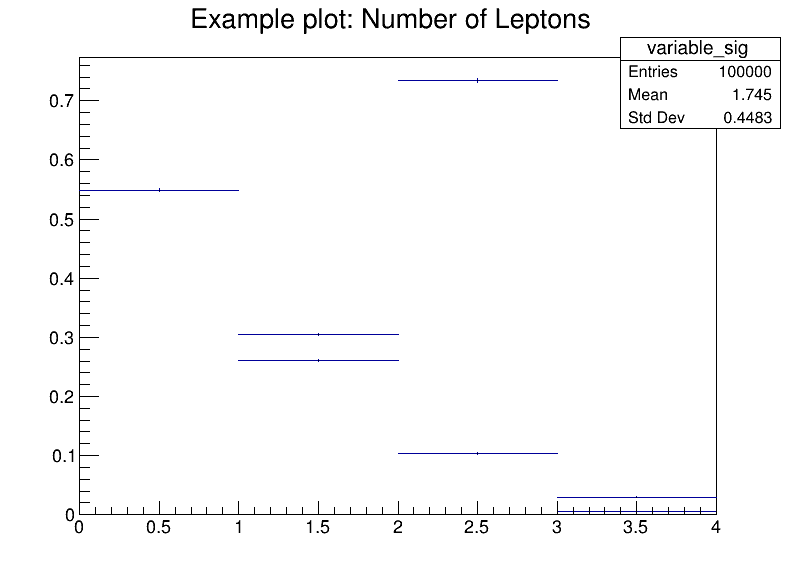

In [7]:
scale_sig = h_sig.Integral()
h_sig.Scale(1/scale_sig)

scale2_sig = h2_sig.Integral()
h2_sig.Scale(1/scale2_sig)

##
h_sig.Draw()
h2_sig.Draw("same")
c.Draw()

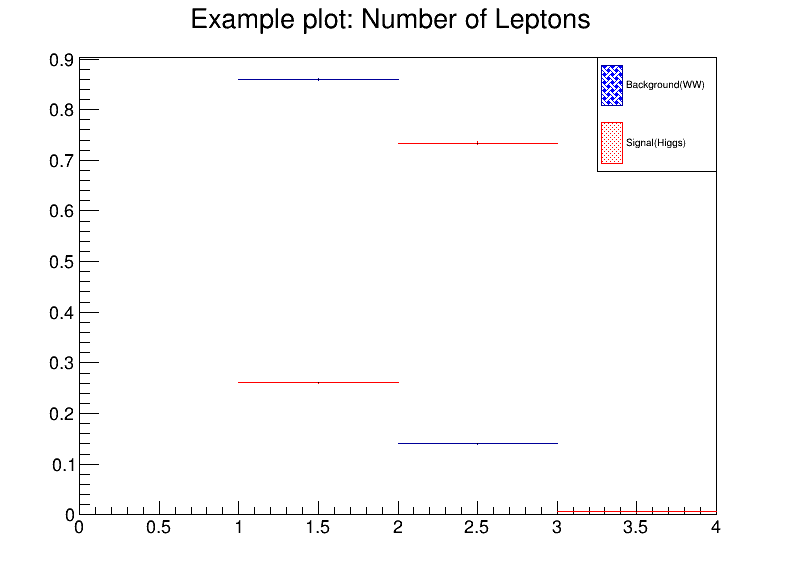

In [8]:
scale_bgs = h_bgs.Integral()
h_bgs.Scale(1/scale_bgs)

scale2_bgs= h2_bgs.Integral()
h2_bgs.Scale(1/scale2_bgs)


h_bgs.SetFillStyle(3008)
h_bgs.SetFillColor(4)
h_sig.SetFillStyle(3003)
h_sig.SetFillColor(2)

legend=ROOT.TLegend(0.75,0.7,0.9,0.9)
legend.AddEntry(h_bgs,"Background(WW)","f")
legend.AddEntry(h_sig,"Signal(Higgs)","f")

h_sig.SetLineColor(2)
h_sig.SetStats(0)
h_bgs.SetStats(0)

h_bgs.Draw()
h_sig.Draw("same")
legend.Draw()
c.Draw()


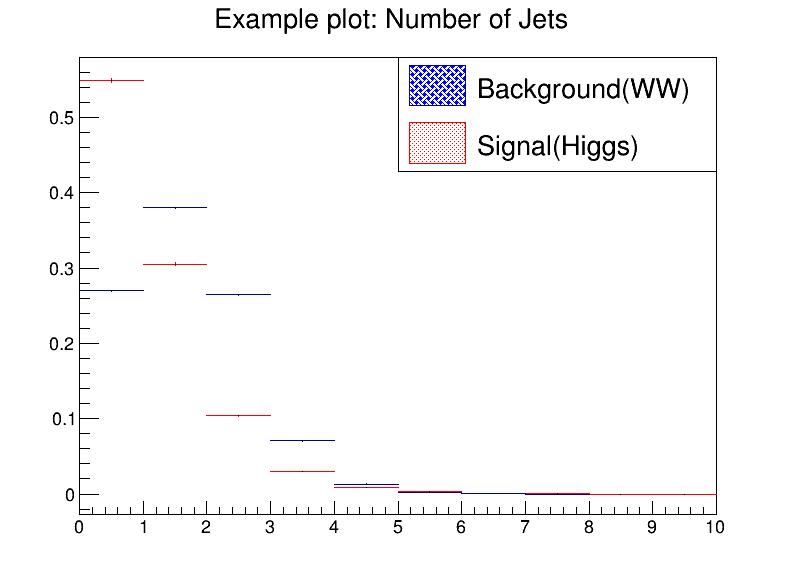

In [9]:

h2_bgs.SetFillStyle(3008)
h2_bgs.SetFillColor(4)
h2_sig.SetFillStyle(3003)
h2_sig.SetFillColor(2)

legend=ROOT.TLegend(0.5,0.7,0.9,0.9)
legend.AddEntry(h2_bgs,"Background(WW)","f")
legend.AddEntry(h2_sig,"Signal(Higgs)","f")


h2_sig.SetLineColor(2)
h2_sig.SetStats(0)
h2_bgs.SetStats(0)
h2_sig.Draw()
h2_bgs.Draw("same")
legend.Draw()
c.Draw()
